In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [57]:
df = pd.read_csv("dados_educ.csv")
df.head()

,Territorialidades,% de matrículas da rede pública no ensino fundamental 2017,% de matrículas da rede pública no ensino médio 2017,% de matrículas da rede privada no ensino fundamental 2017,% de matrículas da rede privada no ensino médio 2017,IDEB anos iniciais do ensino fundamental 2017,IDEB anos finais do ensino fundamental 2017,Média de anos de estudo 2012,Média de anos de estudo 2017,Taxa de analfabetismo - 15 anos ou mais de idade 2012,...,Desagregação MULHER % de 18 a 20 anos de idade com ensino médio completo PNAD...171,Desagregação MULHER % de 25 anos ou mais de idade com ensino médio completo PNAD...172,Desagregação MULHER % de 25 anos ou mais de idade com ensino médio completo PNAD...173,Desagregação MULHER % de 25 anos ou mais de idade com ensino superior completo PNAD...174,Desagregação MULHER % de 25 anos ou mais de idade com ensino superior completo PNAD...175,Desagregação NEGRO % de 6 a 14 anos no ensino fundamental com 2 anos ou mais de atraso idade-série PNAD...176,Desagregação NEGRO % de 6 a 14 anos no ensino fundamental com 2 anos ou mais de atraso idade-série PNAD...177,Desagregação NEGRO % de 15 a 17 anos de idade com ensino fundamental completo PNAD...178,Desagregação NEGRO % de 15 a 17 anos de idade com ensino fundamental completo PNAD...179,regiões
0,Brasil,83.16,87.76,16.84,12.24,5.5,4.4,7.54,8.22,8.68,...,65.37,42.68,49.39,13.33,16.00,18.68,11.45,56.73,65.35,BR
1,Acre,95.65,95.88,4.35,4.12,5.7,4.6,6.79,7.09,14.14,...,56.96,42.41,46.01,11.99,14.08,19.62,12.39,58.42,64.57,N
2,Alagoas,83.04,85.48,16.96,14.52,4.9,3.9,5.89,6.38,19.79,...,51.24,30.57,36.08,8.07,10.23,18.19,15.72,45.59,55.83,NE
3,Amapá,90.87,92.23,9.13,7.77,4.4,3.5,8.12,8.70,6.09,...,53.61,53.34,56.53,14.62,18.23,27.55,17.95,61.03,67.28,N
4,Amazonas,92.86,96.15,7.14,3.85,5.3,4.4,7.69,8.50,7.48,...,61.87,47.52,55.40,9.93,14.73,18.87,12.55,50.03,66.63,N


# Analfabetismo

In [18]:
df_an = df[["Territorialidades", "regiões", "Taxa de analfabetismo - 15 anos ou mais de idade 2012", "Taxa de analfabetismo - 15 anos ou mais de idade 2017"]]
df_an.columns = ["estado", "região", "analfabetismo 2012", "analfabetismo 2017"]
df_an.drop(0, axis = 0, inplace = True)
df_an.head()

,estado,região,analfabetismo 2012,analfabetismo 2017
0,Brasil,BR,8.68,7.10
1,Acre,N,14.14,12.60
2,Alagoas,NE,19.79,18.19
3,Amapá,N,6.09,5.63
4,Amazonas,N,7.48,6.66


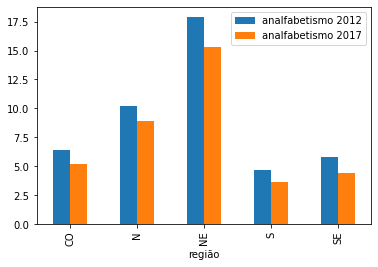

In [17]:
df_an.groupby("região").mean().plot(kind = "bar")
plt.savefig('analfabetismo.png')

C:\Users\Bruno Marcelino\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='região'>

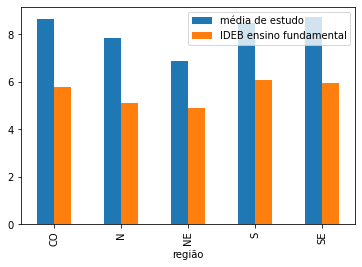

In [54]:
df_an = df[["Territorialidades", "regiões", "Média de anos de estudo 2017",
            "IDEB anos iniciais do ensino fundamental 2017"]]
df_an.columns = ["estado", "região", "média de estudo", "IDEB ensino fundamental"]
df_an.drop(0, axis = 0, inplace = True)
df_an.groupby("região").mean().plot(kind = "bar")

C:\Users\Bruno Marcelino\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

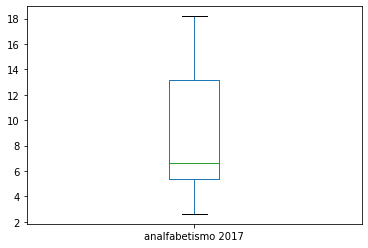

In [65]:
df_an = df[["Territorialidades", "regiões", "Média de anos de estudo 2017",
            "IDEB anos iniciais do ensino fundamental 2017", "Taxa de analfabetismo - 15 anos ou mais de idade 2017"]]
df_an.columns = ["estado", "região", "média de estudo", "IDEB ensino fundamental", "analfabetismo 2017"]
df_an.drop(0, axis = 0, inplace = True)
df_an["analfabetismo 2017"].plot(kind = "box")

<AxesSubplot:ylabel='Frequency'>

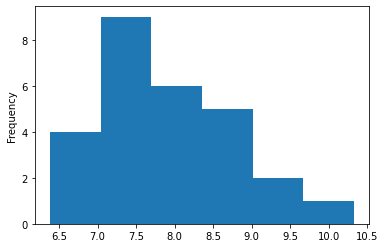

In [70]:
df_an = df[["Territorialidades", "regiões", "Média de anos de estudo 2017",
            "IDEB anos iniciais do ensino fundamental 2017", "Taxa de analfabetismo - 15 anos ou mais de idade 2017"]]
df_an.columns = ["estado", "região", "média de estudo", "IDEB ensino fundamental", "analfabetismo 2017"]
df_an.drop(0, axis = 0, inplace = True)
df_an["média de estudo"].plot(kind = "hist", bins = 6)

C:\Users\Bruno Marcelino\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


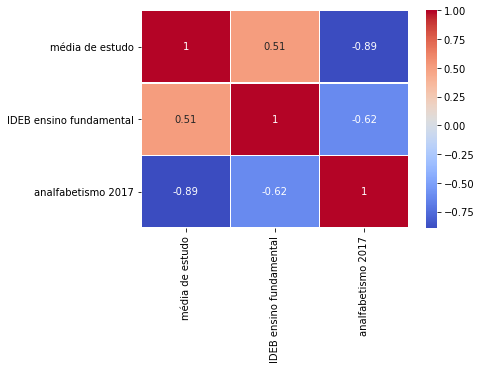

In [62]:
df_an = df[["Territorialidades", "regiões", "Média de anos de estudo 2017",
            "IDEB anos iniciais do ensino fundamental 2017", "Taxa de analfabetismo - 15 anos ou mais de idade 2017"]]
df_an.columns = ["estado", "região", "média de estudo", "IDEB ensino fundamental", "analfabetismo 2017"]
df_an.drop(0, axis = 0, inplace = True)
sns.heatmap(df_an.corr(), cmap = "coolwarm", annot = True, linewidths = .6);

# Segunda ideia: Média de anos de estudo

* Desagregação HOMEM Média de anos de estudo PNAD
* Desagregação MULHER Média de anos de estudo PNAD
* Média de anos de estudo PNAD (Homem 2012/2017 x Mulher 2012/2017 x )

In [73]:
df_an = df[["Territorialidades", "regiões", "Desagregação MULHER Média de anos de estudo PNAD...133",
            "Desagregação HOMEM Média de anos de estudo PNAD...67"]]
df_an.columns = ["estado", "região", "média mulheres", "média homens"]
df_an.drop(0, axis = 0, inplace = True)

In [81]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_an['média mulheres'], df_an['média homens'])
print(round(fvalue,2), round(pvalue, 3))
print("|P| < 0.05, logo há diferença entre as médias")

5.49 0.023
|P| < 0.05, logo há diferença entre as médias


In [82]:
round(df_an.describe(), 2)

,média mulheres,média homens
count,27.00,27.00
mean,8.16,7.52
std,0.88,1.11
min,6.71,5.88
25%,7.49,6.70
50%,8.23,7.43
75%,8.63,8.24
max,10.46,10.18
